In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

ModuleNotFoundError: No module named 'statsmodels'

We can see that the overall p-value from the ANOVA table is 0.01258.

Since this is less than .05, we have sufficient evidence to say that the mean values across each group are not equal.

In [ ]:
#enter data for three groups
a = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
b = [91, 92, 93, 90, 97, 94, 82, 88, 95, 96]
c = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

#perform one-way ANOVA
f_oneway(a, b, c)



F_onewayResult(statistic=5.167774552944481, pvalue=0.012582197136592609)

In [ ]:
 from scipy.stats import f
 dfn = 2
 dfd = 27
 f_statistic = 5.167774552944481
 p_value = f.sf(f_statistic, dfn, dfd )
 print("p_valuer", p_value )

p_valuer 0.012582197136592609


Here’s how to interpret the output:

    P-value for the difference in means between a and b: .0159
    P-value for the difference in means between a and c: .8894
    P-value for the difference in means between b and c: .0454
Thus, we would conclude that there is a statistically significant difference between the means of groups a and b and groups b and c, but not a statistically significant difference between the means of groups a and c.

In [ ]:
#create DataFrame to hold data
df = pd.DataFrame({'score': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80,
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'group': np.repeat(['a', 'b', 'c'], repeats=10)})

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

#display results
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b      8.4 0.0159   1.4259 15.3741   True
     a      c      1.3 0.8894  -5.6741  8.2741  False
     b      c     -7.1 0.0454 -14.0741 -0.1259   True
-----------------------------------------------------


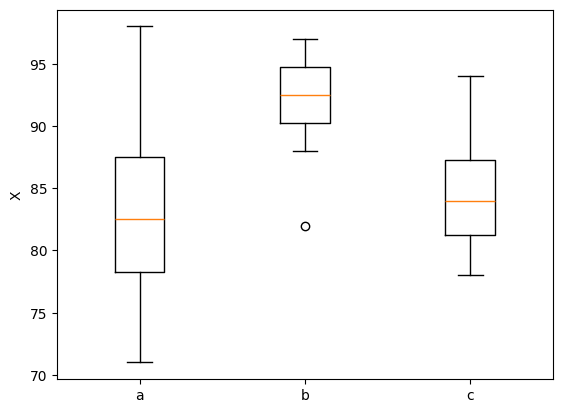

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([a, b, c])
ax.set_xticklabels(["a", "b", "c"])
ax.set_ylabel("X")
plt.show()